# Symbol upload data over time

This notebook looks at the last year of symbol upload data to determine how upload sizes are trending.

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import datetime

I used the Mozilla Symbol Server Upload API to download data about uploads. This data contains sizes of the uploaded symbols.zip files which is a container for multiple .sym and other files.

Text(0, 0.5, 'size (mb)')

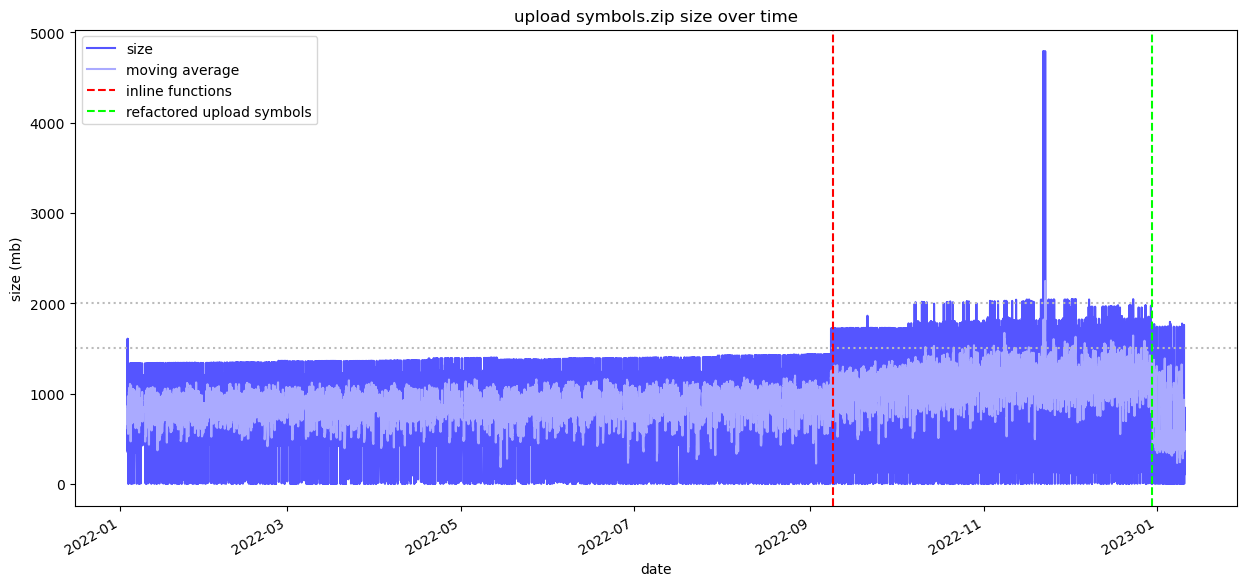

In [25]:
def value_to_mb(num):
    return num / 1024 / 1024


# Data file is a csv with [datetime, timing (ms)];
#
# Note: Path is dependent on this notebook running in the Docker container.
data = pd.read_csv("./symbol_upload_data/upload_data_20230110.csv")
data["created_at"] = pd.to_datetime(data["created_at"], utc=True)
data["size"] = pd.to_numeric(data["size"]).apply(value_to_mb)


input_data = data[["created_at", "size"]]
first_date = input_data["created_at"].min()
last_date = input_data["created_at"].max()
input_data.set_index("created_at", inplace=True)

df = input_data["size"]
df.plot(style="#5555ff", xlabel="date", ylabel="size (mb)", figsize=(15, 7))
df.ewm(span=24).mean().plot(style="#aaaaff", label="moving average")

plt.axhline(y=1500, linestyle="dotted", color="#bbbbbb")
plt.axhline(y=2000, linestyle="dotted", color="#bbbbbb")
plt.axvline(x="2022-09-09", linestyle="--", color="#ff0000", label="inline functions")
plt.axvline(x="2022-12-30", linestyle="--", color="#00ff00", label="refactored upload symbols")
plt.legend()

plt.title("upload symbols.zip size over time")
plt.xlabel("date")
plt.ylabel("size (mb)")